### 12. Polígono de Frequência Use os pesos do plástico descartado para construir um polígono de frequência.
#### Para o eixo horizontal, use os pontos médios destes intervalos de classe: 0,00–0,99; 1,00–1,99; 2,00–2,99; 3,00–3,99; 4,00–4,99; 5,00–5,99.

In [9]:
# importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# versão bibliotecas
print(f'Versão Pandas: {pd.__version__}')
print(f'Versão Seaborn: {sns.__version__}')
print(f'Versão Matplotlib: {matplotlib.__version__}')

Versão Pandas: 2.2.3
Versão Seaborn: 0.13.2
Versão Matplotlib: 3.10.0


In [11]:
# valores do exercício
valores = [0.27, 1.41, 2.19, 2.83, 2.19, 1.81, 0.85, 3.05, 3.42, 2.10, 2.93, 2.44, 2.17, 1.41, 2.00, 0.93, 2.97,
           2.04, 0.65, 2.13, 0.63, 1.53, 4.69, 0.15, 1.45, 2.68, 3.53, 1.49, 2.31, 0.92, 0.89, 0.80, 0.72, 2.66,
           4.37, 0.92, 1.40, 1.45, 1.68, 1.53, 1.44, 1.44, 1.36, 0.38, 1.74, 2.35, 2.30, 1.14, 2.88, 2.13, 5.28,
           1.48, 3.36, 2.83, 2.87, 2.96, 1.61, 1.58, 1.15, 1.28, 0.58, 0.74]

In [12]:
# valores ordenados
ordenados = pd.Series(valores).sort_values().reset_index(drop=True)

In [13]:
# fronteiras de classes
classes = {
    "Pesos de Plástico Descartados": ["0–0.99", "1–1.99", "2–2.99", "3–3.99", "4–4.99", "5–5.99"]
}

In [14]:
# categorizar dados
bins = [0, 1, 2, 3, 4, 5, 6]
cat = pd.cut(x = ordenados, bins = bins, labels = classes["Pesos de Plástico Descartados"], include_lowest=True, right=False)

In [15]:
# frequências
freq = cat.value_counts().sort_index()
freq

0–0.99    14
1–1.99    20
2–2.99    21
3–3.99     4
4–4.99     2
5–5.99     1
Name: count, dtype: int64

In [16]:
# gerar pontos médios de classes
ponto1 = bins[0]
ampltd = (bins[1] - bins[0])
ponto2 = bins[1] - 0.1
classe = len(freq)

pm = ((ponto1 + ponto2) / 2)

pf = []
n = 1
while n <= classe:
    pf.append(pm)
    pm+=ampltd
    n+=1
pf

[0.45, 1.45, 2.45, 3.45, 4.45, 5.45]

In [17]:
# gerar distribuição de frequência
df = pd.DataFrame(classes)
df['Frequência'] = freq.tolist()
df

,Pesos de Plástico Descartados,Frequência
0,0–0.99,14
1,1–1.99,20
2,2–2.99,21
3,3–3.99,4
4,4–4.99,2
5,5–5.99,1


<Axes: title={'center': 'Análise - Descarte Semanal de Resíduos Plásticos por Família'}, xlabel='Pesos de Resíduos Plásticos descartados (em lbs)', ylabel='Frequência'>

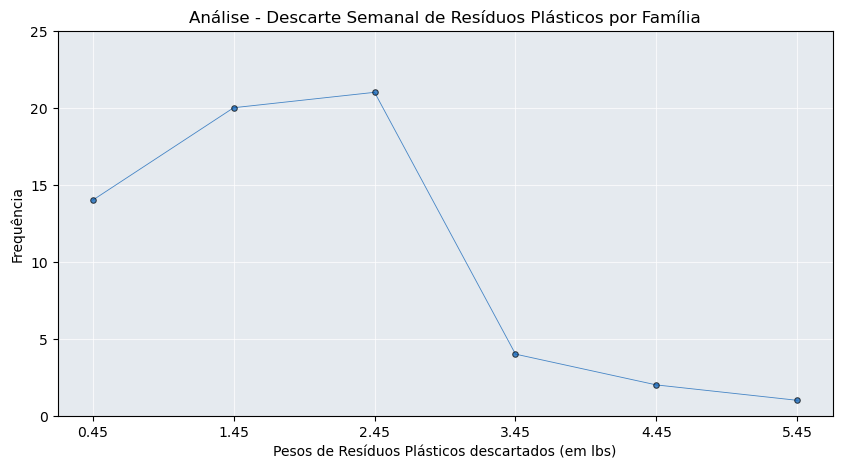

In [21]:
# plotando polígono de frequencia

# criando a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 5))

# configurando o eixo
ax.set_facecolor('#E5EAEF')
ax.set_xticks(pf)
ax.set_title("Análise - Descarte Semanal de Resíduos Plásticos por Família")
ax.set_ylabel("Frequência")
ax.set_xlabel("Pesos de Resíduos Plásticos descartados (em lbs)")
ax.set_ylim(0, 25)
ax.grid(visible=True, which='major', axis='both', alpha = 0.7, color = 'white')

# configurando o gráfico de linha
sns.lineplot(x = pf, y = freq, data = df,
             marker = 'o', markeredgecolor = 'black', markerfacecolor = '#0059B3', markersize = 4,
             linewidth = 0.6, color = '#0059B3', alpha = 0.7)